# Important Libraries used


In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import math
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# QUESTION 1

In [2]:
# Data reading and encoding for removing unnecessary features
data = pd.read_csv("Paris_weather_data_2017.csv",encoding='ISO-8859-1')
data

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),...,avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),high Gust Wind (km/h),sum Precip. (mm),Events
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,...,1023,1020,7.0,3.0,0.0,10,6,-,0,Fog
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,...,1025,1022,14.0,4.0,0.0,16,6,-,2,"Fog , Rain , Snow"
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,...,1030,1028,7.0,2.0,0.0,14,6,-,0,Fog
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,...,1025,1023,19.0,9.0,3.0,23,14,-,2,Rain
4,1/5/2017,7,3,1,2,0,-2,93,79,59,...,1032,1027,19.0,12.0,10.0,14,11,-,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2017,6,4,3,5,2,-2,93,82,60,...,987,982,31.0,12.0,6.0,39,24,58,4,Rain
361,12/28/2017,6,2,-1,1,-1,-3,93,80,57,...,1005,999,31.0,16.0,10.0,19,13,-,0,NaN
362,12/29/2017,8,3,-1,6,2,-1,100,85,54,...,1006,1000,31.0,12.0,3.0,32,13,47,12,"Rain , Thunderstorm"
363,12/30/2017,14,10,6,12,10,4,100,87,73,...,1006,1000,19.0,9.0,3.0,32,19,55,3,Rain


High Gust Wind\xa0(km/h) and Events columns were dropped since they are unwanted in the dataset.

By using .info(), primary information of the dataset was obtained.

In [3]:
new_data=data.drop(["high Gust Wind\xa0(km/h)", "Events"], axis=1)
new_data

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,1/5/2017,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2017,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
361,12/28/2017,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,12/29/2017,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,12/30/2017,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         365 non-null    object 
 1   high Temp. (°C)              365 non-null    int64  
 2   avg Temp. (°C)               365 non-null    int64  
 3   low Temp. (°C)               365 non-null    int64  
 4   high Dew Point (°C)          365 non-null    int64  
 5   avg Dew Point (°C)           365 non-null    int64  
 6   low Dew Point (°C)           365 non-null    int64  
 7   high Humidity (%)            365 non-null    int64  
 8   avg Humidity (%)             365 non-null    int64  
 9   low Humidity (%)             365 non-null    int64  
 10  high Sea Level Press. (hPa)  365 non-null    int64  
 11  avg Sea Level Press. (hPa)   365 non-null    int64  
 12  low Sea Level Press. (hPa)   365 non-null    int64  
 13  high Visibility (km)

Forward Interpolation was used for creating new data points to fill missing values. 

In [5]:
interpolated_data = new_data.interpolate(method ='linear', limit_direction ='forward')
interpolated_data

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,1/1/2017,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,1/2/2017,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,1/3/2017,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,1/4/2017,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,1/5/2017,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2017,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
361,12/28/2017,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,12/29/2017,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,12/30/2017,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


In [6]:
interpolated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         365 non-null    object 
 1   high Temp. (°C)              365 non-null    int64  
 2   avg Temp. (°C)               365 non-null    int64  
 3   low Temp. (°C)               365 non-null    int64  
 4   high Dew Point (°C)          365 non-null    int64  
 5   avg Dew Point (°C)           365 non-null    int64  
 6   low Dew Point (°C)           365 non-null    int64  
 7   high Humidity (%)            365 non-null    int64  
 8   avg Humidity (%)             365 non-null    int64  
 9   low Humidity (%)             365 non-null    int64  
 10  high Sea Level Press. (hPa)  365 non-null    int64  
 11  avg Sea Level Press. (hPa)   365 non-null    int64  
 12  low Sea Level Press. (hPa)   365 non-null    int64  
 13  high Visibility (km)

In [7]:
interpolated_data.isnull().sum()

Date                           0
high Temp. (°C)                0
avg Temp. (°C)                 0
low Temp. (°C)                 0
high Dew Point (°C)            0
avg Dew Point (°C)             0
low Dew Point (°C)             0
high Humidity (%)              0
avg Humidity (%)               0
low Humidity (%)               0
high Sea Level Press. (hPa)    0
avg Sea Level Press. (hPa)     0
low Sea Level Press. (hPa)     0
high Visibility (km)           0
avg Visibility (km)            0
low Visibility (km)            0
high Wind (km/h)               0
avg Wind (km/h)                0
sum Precip. (mm)               0
dtype: int64

.info() and isnull.().sum() were used to check if the data has cleaned and can be used.

# QUESTION 2

 The Calculated correlation matrix between all the weather variables was obtained using .corr()

In [36]:
corrMatrix = new_data.corr()
corrMatrix

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
high Temp. (°C),1.000000,0.976658,0.888110,0.856099,0.858129,0.843248,-0.394430,-0.642644,-0.653028,-0.253617,-0.150903,-0.088462,0.498002,0.599364,0.432615,-0.081673,-0.199951,-0.059089
avg Temp. (°C),0.976658,1.000000,0.962072,0.913373,0.921361,0.909771,-0.378330,-0.562269,-0.553089,-0.308957,-0.203274,-0.135283,0.491896,0.528101,0.380880,-0.020533,-0.118921,-0.009994
low Temp. (°C),0.888110,0.962072,1.000000,0.929764,0.944682,0.938312,-0.333137,-0.424648,-0.389762,-0.365482,-0.261217,-0.190036,0.456098,0.403852,0.291591,0.054929,-0.007974,0.052513
high Dew Point (°C),0.856099,0.913373,0.929764,1.000000,0.978604,0.940691,-0.087426,-0.233558,-0.262292,-0.355841,-0.264679,-0.192708,0.434968,0.288801,0.134582,0.019975,-0.096624,0.132642
avg Dew Point (°C),0.858129,0.921361,0.944682,0.978604,1.000000,0.979591,-0.094926,-0.214550,-0.231225,-0.329256,-0.229100,-0.158419,0.401721,0.280088,0.138309,-0.028561,-0.120984,0.108504
low Dew Point (°C),0.843248,0.909771,0.938312,0.940691,0.979591,1.000000,-0.111733,-0.218440,-0.221393,-0.303539,-0.199631,-0.133562,0.382905,0.289000,0.154723,-0.067316,-0.138766,0.073233
high Humidity (%),-0.394430,-0.378330,-0.333137,-0.087426,-0.094926,-0.111733,1.000000,0.784955,0.564862,0.060913,0.018209,0.005438,-0.217346,-0.552212,-0.652400,-0.104845,-0.162285,0.216222
avg Humidity (%),-0.642644,-0.562269,-0.424648,-0.233558,-0.214550,-0.218440,0.784955,1.000000,0.913106,0.088453,0.034150,0.014301,-0.420874,-0.772441,-0.709152,-0.035586,0.009024,0.263498
low Humidity (%),-0.653028,-0.553089,-0.389762,-0.262292,-0.231225,-0.221393,0.564862,0.913106,1.000000,0.125158,0.069619,0.041238,-0.489036,-0.725759,-0.607864,-0.002123,0.081944,0.203391
high Sea Level Press. (hPa),-0.253617,-0.308957,-0.365482,-0.355841,-0.329256,-0.303539,0.060913,0.088453,0.125158,1.000000,0.964592,0.899322,-0.425677,-0.162268,-0.090664,-0.485558,-0.371158,-0.359849


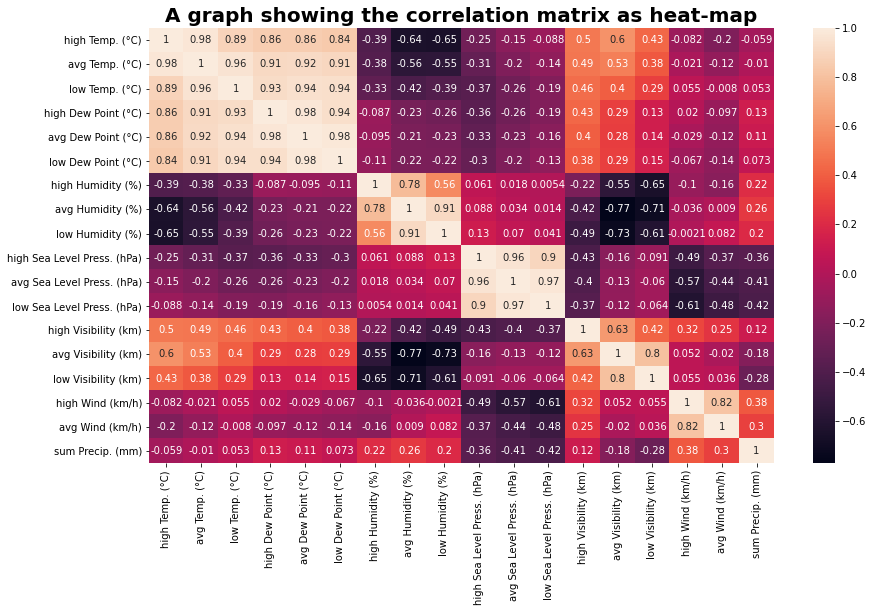

In [37]:
plt.figure (figsize=(14,8))
sns.heatmap(corrMatrix, annot=True,color="black")
plt.title('A graph showing the correlation matrix as heat-map',color="black",fontsize=20,fontweight="bold")
plt.show()

# QUESTION 3

In [10]:
electricity_data = pd.read_excel("Historique_consommation_JOUR_2017.xls",skiprows=10)
electricity_data

,Unnamed: 0,Unnamed: 1,HISTORIQUE DES CONSOMMATIONS JOURNALIERES EN ENERGIE (MWh),Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,ANNEE 2017,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Les données accessibles ci-dessous reflètent l...,NaN,NaN,NaN,NaN,NaN
3,Ces données sont calculées à partir de données...,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
379,NaN,NaN,NaN,27/12/2017,Définitives,1582970
380,NaN,NaN,NaN,28/12/2017,Définitives,1664743
381,NaN,NaN,NaN,29/12/2017,Définitives,1668623
382,NaN,NaN,NaN,30/12/2017,Définitives,1437082


In [11]:
electric_data = pd.read_csv("Historique_consommation_JOUR_2017.csv",skiprows=7,encoding='ISO-8859-1')
electric_data
electric = electric_data.drop(["Unnamed: 0","Unnamed: 1","Unnamed: 2"], axis=1)
electric

,Date,Type de données,Energie journalière (MWh)
0,NaN,NaN,NaN
1,01/01/2017,Définitives,1652084.0
2,02/01/2017,Définitives,1768332.0
3,03/01/2017,Définitives,1886120.0
4,04/01/2017,Définitives,1923775.0
...,...,...,...
372,27/12/2017,Définitives,1582970.0
373,28/12/2017,Définitives,1664743.0
374,29/12/2017,Définitives,1668623.0
375,30/12/2017,Définitives,1437082.0


In [12]:
droped_electric = electric.drop([0])
droped_electric

,Date,Type de données,Energie journalière (MWh)
1,01/01/2017,Définitives,1652084.0
2,02/01/2017,Définitives,1768332.0
3,03/01/2017,Définitives,1886120.0
4,04/01/2017,Définitives,1923775.0
5,05/01/2017,Définitives,1887470.0
...,...,...,...
372,27/12/2017,Définitives,1582970.0
373,28/12/2017,Définitives,1664743.0
374,29/12/2017,Définitives,1668623.0
375,30/12/2017,Définitives,1437082.0


In [13]:
droped_electric.isnull().sum()

Date                         11
Type de données              11
Energie journalière (MWh)    11
dtype: int64

In [14]:
interpolated_electric = droped_electric.interpolate(method ='linear', limit_direction ='forward')
interpolated_electric1=interpolated_electric.dropna()
interpolated_electric1

,Date,Type de données,Energie journalière (MWh)
1,01/01/2017,Définitives,1652084.0
2,02/01/2017,Définitives,1768332.0
3,03/01/2017,Définitives,1886120.0
4,04/01/2017,Définitives,1923775.0
5,05/01/2017,Définitives,1887470.0
...,...,...,...
372,27/12/2017,Définitives,1582970.0
373,28/12/2017,Définitives,1664743.0
374,29/12/2017,Définitives,1668623.0
375,30/12/2017,Définitives,1437082.0


In [15]:
interpolated_electric1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 376
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       365 non-null    object 
 1   Type de données            365 non-null    object 
 2   Energie journalière (MWh)  365 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.4+ KB


In [16]:
interpolated_electric1.isnull().sum()

Date                         0
Type de données              0
Energie journalière (MWh)    0
dtype: int64

# QUESTION 4

In [17]:
interpolated_electric1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 376
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       365 non-null    object 
 1   Type de données            365 non-null    object 
 2   Energie journalière (MWh)  365 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.4+ KB


In [18]:
interpolated_electric1['Date']=pd.to_datetime(interpolated_electric1['Date'], format = "%d/%m/%Y")
interpolated_electric1

,Date,Type de données,Energie journalière (MWh)
1,2017-01-01,Définitives,1652084.0
2,2017-01-02,Définitives,1768332.0
3,2017-01-03,Définitives,1886120.0
4,2017-01-04,Définitives,1923775.0
5,2017-01-05,Définitives,1887470.0
...,...,...,...
372,2017-12-27,Définitives,1582970.0
373,2017-12-28,Définitives,1664743.0
374,2017-12-29,Définitives,1668623.0
375,2017-12-30,Définitives,1437082.0


In [39]:
interpolated_data['Date']=pd.to_datetime(interpolated_data['Date'], format = "%m/%d/%Y")
interpolated_data

,Date,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
361,2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,2017-12-30,14,10,6,12,10,4,100,87,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


In [20]:
merged_data1=interpolated_electric1.merge(interpolated_data,on='Date')
merged_data1

,Date,Type de données,Energie journalière (MWh),high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),...,low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
0,2017-01-01,Définitives,1652084.0,0,-3,-5,-1,-3,-6,100,...,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,2017-01-02,Définitives,1768332.0,2,0,-2,1,1,-1,100,...,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,2017-01-03,Définitives,1886120.0,1,0,-1,1,0,-1,100,...,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,2017-01-04,Définitives,1923775.0,6,2,-1,4,1,-1,100,...,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,2017-01-05,Définitives,1887470.0,7,3,1,2,0,-2,93,...,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2017-12-27,Définitives,1582970.0,6,4,3,5,2,-2,93,...,60,998,987,982,31.0,12.0,6.0,39,24,4
361,2017-12-28,Définitives,1664743.0,6,2,-1,1,-1,-3,93,...,57,1011,1005,999,31.0,16.0,10.0,19,13,0
362,2017-12-29,Définitives,1668623.0,8,3,-1,6,2,-1,100,...,54,1012,1006,1000,31.0,12.0,3.0,32,13,12
363,2017-12-30,Définitives,1437082.0,14,10,6,12,10,4,100,...,73,1011,1006,1000,19.0,9.0,3.0,32,19,3


In [21]:
merged_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         365 non-null    datetime64[ns]
 1   Type de données              365 non-null    object        
 2   Energie journalière (MWh)    365 non-null    float64       
 3   high Temp. (°C)              365 non-null    int64         
 4   avg Temp. (°C)               365 non-null    int64         
 5   low Temp. (°C)               365 non-null    int64         
 6   high Dew Point (°C)          365 non-null    int64         
 7   avg Dew Point (°C)           365 non-null    int64         
 8   low Dew Point (°C)           365 non-null    int64         
 9   high Humidity (%)            365 non-null    int64         
 10  avg Humidity (%)             365 non-null    int64         
 11  low Humidity (%)             365 non-null    

In [22]:
energy_temperature = merged_data1[["Date", "Energie journalière (MWh)", "avg Temp.\xa0(°C)"]]
energy_temperature

,Date,Energie journalière (MWh),avg Temp. (°C)
0,2017-01-01,1652084.0,-3
1,2017-01-02,1768332.0,0
2,2017-01-03,1886120.0,0
3,2017-01-04,1923775.0,2
4,2017-01-05,1887470.0,3
...,...,...,...
360,2017-12-27,1582970.0,4
361,2017-12-28,1664743.0,2
362,2017-12-29,1668623.0,3
363,2017-12-30,1437082.0,10


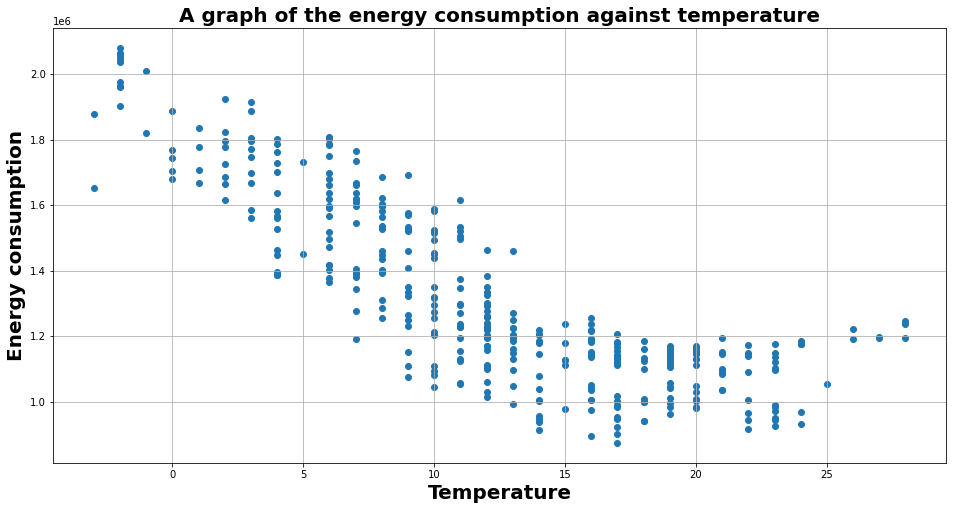

In [23]:
plt.figure (figsize=(16,8))
plt.scatter(energy_temperature["avg Temp.\xa0(°C)"], energy_temperature["Energie journalière (MWh)"])
plt.title('A graph of the energy consumption against temperature',color="black",fontsize=20,fontweight="bold")
plt.xlabel('Temperature',color="black",fontsize=20,fontweight="bold")
plt.ylabel('Energy consumption',color="black",fontsize=20,fontweight="bold")
plt.grid()
plt.show()

# QUESTION 5

In [24]:
energy_temperature

,Date,Energie journalière (MWh),avg Temp. (°C)
0,2017-01-01,1652084.0,-3
1,2017-01-02,1768332.0,0
2,2017-01-03,1886120.0,0
3,2017-01-04,1923775.0,2
4,2017-01-05,1887470.0,3
...,...,...,...
360,2017-12-27,1582970.0,4
361,2017-12-28,1664743.0,2
362,2017-12-29,1668623.0,3
363,2017-12-30,1437082.0,10


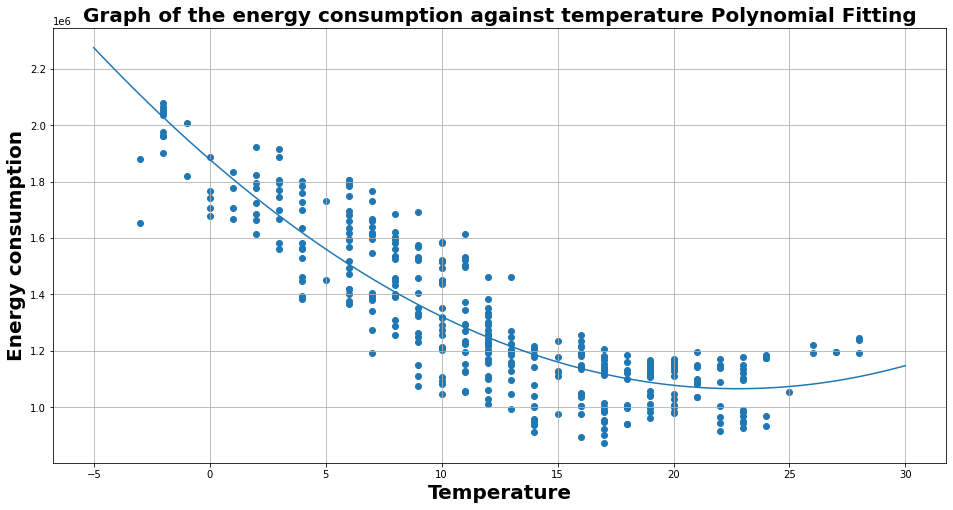

In [25]:
plt.figure (figsize=(16,8))
X=energy_temperature["avg Temp.\xa0(°C)"]
Y=energy_temperature["Energie journalière (MWh)"]

myModel = np.poly1d(np.polyfit(X,Y, 2))
myline  =  np.linspace(-5, 30, len(energy_temperature["Energie journalière (MWh)"]))

plt.scatter(X, Y)
plt.plot(myline , myModel(myline))

plt.title('Graph of the energy consumption against temperature Polynomial Fitting',color="black",fontsize=20,fontweight="bold")
plt.xlabel('Temperature',color="black",fontsize=20,fontweight="bold")
plt.ylabel('Energy consumption',color="black",fontsize=20,fontweight="bold")

plt.grid()
plt.show() 


# QUESTION 6

The minimum energy is: 1065866.1724185245
The optimal temperature is: 22.78846153846154


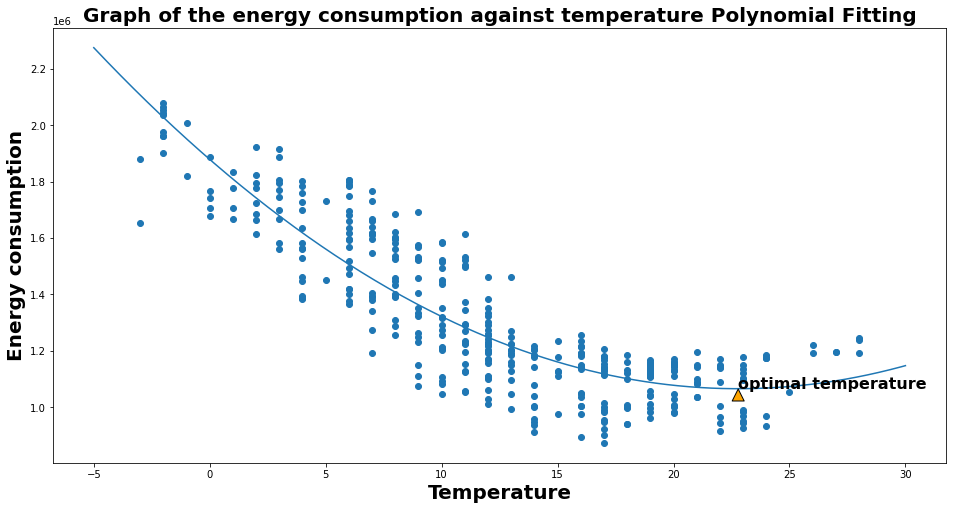

In [40]:
plt.figure (figsize=(16,8))
X=energy_temperature["avg Temp.\xa0(°C)"]
Y=energy_temperature["Energie journalière (MWh)"]

myModel = np.poly1d(np.polyfit(X,Y, 2))
myline =  np.linspace(-5, 30, len(energy_temperature["Energie journalière (MWh)"]))

plt.scatter(X, Y)
plt.plot(myline, myModel(myline))

plt.title('Graph of the energy consumption against temperature Polynomial Fitting',color="black",fontsize=20,fontweight="bold")
plt.xlabel('Temperature',color="black",fontsize=20,fontweight="bold")
plt.ylabel('Energy consumption',color="black",fontsize=20,fontweight="bold")


energyMinimum = min(myModel(myline))
print("The minimum energy is:",energyMinimum)
idx = np.argmin(myModel(myline))
opt_temp = myline[idx]
print("The optimal temperature is:",opt_temp)

plt.annotate("optimal temperature",color="black",fontsize=16,fontweight="bold", xy =(opt_temp, energyMinimum),
                xytext =(opt_temp,energyMinimum+0.01), 
                arrowprops = dict(facecolor ='Orange',
                                  shrink = 0.1),)
plt.show()

# QUESTION 7

In [27]:
data2_merged = merged_data1.set_index('Date')
X_axis = data2_merged.drop(['Energie journalière (MWh)','Type de données'],axis=1)
y=data2_merged['Energie journalière (MWh)']

def backward_regression(X, y,threshold_out,verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
backward_regression(X_axis,y,0.05,True)

Drop low Temp. (°C)                 with p-value 0.916424
Drop avg Temp. (°C)                 with p-value 0.907932
Drop low Dew Point (°C)             with p-value 0.851827
Drop low Visibility (km)            with p-value 0.839408
Drop avg Sea Level Press. (hPa)     with p-value 0.776839
Drop avg Visibility (km)            with p-value 0.553356
Drop sum Precip. (mm)               with p-value 0.534647
Drop high Temp. (°C)                with p-value 0.537801
Drop avg Humidity (%)               with p-value 0.581995
Drop avg Wind (km/h)                with p-value 0.328426
Drop high Wind (km/h)               with p-value 0.576648
Drop high Sea Level Press. (hPa)    with p-value 0.189316
Drop high Dew Point (°C)            with p-value 0.161273


['avg Dew Point\xa0(°C)',
 'high Humidity\xa0(%)',
 'low Humidity\xa0(%)',
 'low Sea Level Press.\xa0(hPa)',
 'high Visibility\xa0(km)']

In [28]:
myFeatures=sm.add_constant(data2_merged[backward_regression(X_axis,y,0.05)])
result= sm.OLS(y,myFeatures).fit()
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.750
Model:                                   OLS   Adj. R-squared:                  0.747
Method:                        Least Squares   F-statistic:                     215.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          7.75e-106
Time:                               20:58:42   Log-Likelihood:                -4840.4
No. Observations:                        365   AIC:                             9693.
Df Residuals:                            359   BIC:                             9716.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

# QUESTION 8

In [29]:
X_axis

,high Temp. (°C),avg Temp. (°C),low Temp. (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),high Sea Level Press. (hPa),avg Sea Level Press. (hPa),low Sea Level Press. (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),sum Precip. (mm)
Date,,,,,,,,,,,,,,,,,,
2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,6,4,3,5,2,-2,93,82,60,998,987,982,31.0,12.0,6.0,39,24,4
2017-12-28,6,2,-1,1,-1,-3,93,80,57,1011,1005,999,31.0,16.0,10.0,19,13,0
2017-12-29,8,3,-1,6,2,-1,100,85,54,1012,1006,1000,31.0,12.0,3.0,32,13,12


In [30]:
X_axis_Squared = X_axis**2
X_axis.columns=[colums + '*' for colums in X_axis.columns]
resetted_X_axis = X_axis.reset_index()
resetted_X_axis_squared = X_axis_Squared.reset_index()
merged_axes = pd.merge(resetted_X_axis, resetted_X_axis_squared, on=["Date"]).set_index('Date')

y=data2_merged['Energie journalière (MWh)']


def backward_regression(X, y,threshold_out,verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
backward_regression(merged_axes,y,0.05,True)

Drop avg Sea Level Press. (hPa)     with p-value 0.975818
Drop avg Humidity (%)               with p-value 0.949611
Drop avg Sea Level Press. (hPa)*    with p-value 0.884823
Drop high Wind (km/h)*              with p-value 0.841054
Drop low Dew Point (°C)             with p-value 0.787455
Drop low Sea Level Press. (hPa)     with p-value 0.644563
Drop high Dew Point (°C)*           with p-value 0.628579
Drop avg Dew Point (°C)             with p-value 0.741332
Drop avg Dew Point (°C)*            with p-value 0.780809
Drop low Humidity (%)               with p-value 0.534316
Drop high Humidity (%)*             with p-value 0.503601
Drop low Visibility (km)*           with p-value 0.565932
Drop low Visibility (km)            with p-value 0.756982
Drop avg Humidity (%)*              with p-value 0.515924
Drop avg Temp. (°C)*                with p-value 0.511367
Drop avg Temp. (°C)                 with p-value 0.671969
Drop sum Precip. (mm)               with p-value 0.461402
Drop avg Wind 

['high Temp.\xa0(°C)*',
 'low Temp.\xa0(°C)*',
 'low Humidity\xa0(%)*',
 'high Visibility\xa0(km)*',
 'high Temp.\xa0(°C)',
 'low Temp.\xa0(°C)',
 'high Dew Point\xa0(°C)',
 'high Visibility\xa0(km)',
 'high Wind\xa0(km/h)']

In [31]:
myFeatures1=sm.add_constant(merged_axes[backward_regression(merged_axes,y,0.05)])
result1= sm.OLS(y,myFeatures1).fit()
print(result1.summary())

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.826
Model:                                   OLS   Adj. R-squared:                  0.821
Method:                        Least Squares   F-statistic:                     186.8
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          7.66e-129
Time:                               20:58:42   Log-Likelihood:                -4774.9
No. Observations:                        365   AIC:                             9570.
Df Residuals:                            355   BIC:                             9609.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

# QUESTION 9

In [32]:
Week_days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for i in range(7):
    merged_axes[Week_days[i]]= (merged_axes.index.dayofweek==i).astype(int) 
    
y=data2_merged['Energie journalière (MWh)']

def backward_regression(X, y,threshold_out,verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
backward_regression(merged_axes,y,0.05,True)

Drop avg Dew Point (°C)             with p-value 0.964748
Drop avg Temp. (°C)*                with p-value 0.926543
Drop avg Sea Level Press. (hPa)*    with p-value 0.899286
Drop low Visibility (km)            with p-value 0.898117
Drop sum Precip. (mm)               with p-value 0.876482
Drop avg Wind (km/h)*               with p-value 0.866617
Drop high Sea Level Press. (hPa)*   with p-value 0.78613
Drop avg Humidity (%)*              with p-value 0.777341
Drop high Humidity (%)              with p-value 0.812918
Drop high Wind (km/h)*              with p-value 0.720753
Drop avg Humidity (%)               with p-value 0.705629
Drop low Visibility (km)*           with p-value 0.512532
Drop high Humidity (%)*             with p-value 0.533028
Drop low Dew Point (°C)             with p-value 0.46457
Drop low Humidity (%)               with p-value 0.351895
Drop high Wind (km/h)               with p-value 0.360228
Drop avg Temp. (°C)                 with p-value 0.381751
Drop avg Visibil

['high Temp.\xa0(°C)*',
 'low Temp.\xa0(°C)*',
 'high Dew Point\xa0(°C)*',
 'low Humidity\xa0(%)*',
 'low Sea Level Press.\xa0(hPa)*',
 'high Visibility\xa0(km)*',
 'sum Precip.\xa0(mm)*',
 'high Temp.\xa0(°C)',
 'low Temp.\xa0(°C)',
 'high Dew Point\xa0(°C)',
 'low Sea Level Press.\xa0(hPa)',
 'high Visibility\xa0(km)',
 'avg Wind\xa0(km/h)',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday']

In [33]:
myFeatures2=sm.add_constant(merged_axes[backward_regression(merged_axes,y,0.05)])
result2= sm.OLS(y,myFeatures2).fit()
print(result2.summary())

                                OLS Regression Results                               
Dep. Variable:     Energie journalière (MWh)   R-squared:                       0.904
Model:                                   OLS   Adj. R-squared:                  0.898
Method:                        Least Squares   F-statistic:                     170.5
Date:                       Mon, 31 Jan 2022   Prob (F-statistic):          2.07e-162
Time:                               20:58:42   Log-Likelihood:                -4666.5
No. Observations:                        365   AIC:                             9373.
Df Residuals:                            345   BIC:                             9451.
Df Model:                                 19                                         
Covariance Type:                   nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------